# Лабораторная работа 

# №8. Фильтрация и свертка

## Писарик Максим, 5130901/10101

In [15]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [16]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
from thinkdsp import decorate
from thinkdsp import SquareSignal

## УПРАЖНЕНИЕ 8.2

В данном упражнении нужно попробовать ДПФ на нескольких примерах. Определить, что происходит с преобразованием Фурье, если меняется std.

Функция ниже позволяет отобразить гауссово окно и его БПФ.

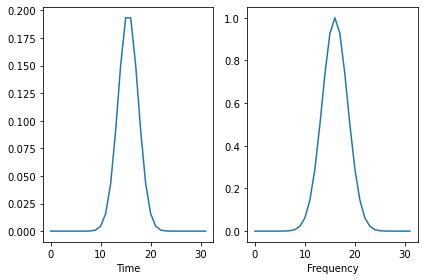

In [18]:
def plot_gaussian(std):
    M = 32
    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)
    
    plt.subplot(1, 2, 1)
    plt.plot(gaussian)
    decorate(xlabel='Time')

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M//2)
    
    plt.subplot(1, 2, 2)
    plt.plot(np.abs(fft_rolled))
    decorate(xlabel='Frequency')
    plt.show()

plot_gaussian(2)

Будем менять std:

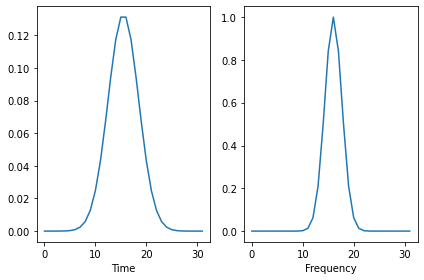

In [19]:
plot_gaussian(3)

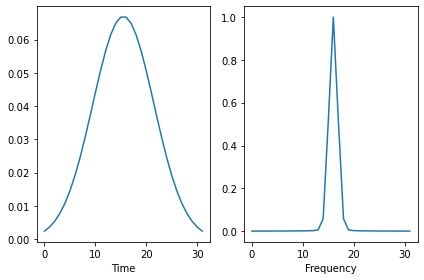

In [20]:
plot_gaussian(6)

Можем заметить, что с увеличением std гауссово окно становится шире, а БПФ становится уже.

## УПРАЖНЕНИЕ 8.3

В данном упражнении необходимо создать окно Хэмминга (и др.), дополнить его нулями и напечатать его ДПФ. Определить, какое окно больше подходит для фильтра НЧ.

Функция для дополнения массива нулями:

In [13]:
def zero_pad(array, n):
    res = np.zeros(n)
    res[:len(array)] = array
    return res

Приведенная ниже функция позволит наглядно сравнить между собой различные окна:

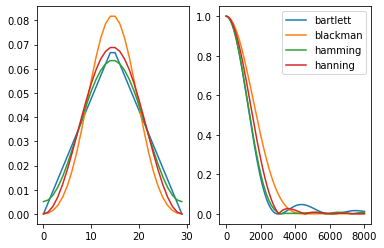

In [21]:
def plot_window(ax, window_fun, M=30):
    signal = SquareSignal(freq=440)
    wave = signal.make_wave(duration=1.0, framerate=44100)
    window = window_fun(M)
    window /= sum(window)
    padded = zero_pad(window, len(wave))
    fft = np.fft.rfft(padded)
    ax[0].plot(window, label=window_fun.__name__)
    ax[1].plot(abs(fft)[:8000], label=window_fun.__name__)
    plt.legend()
    
_, ax = plt.subplots(1, 2)
for w in [np.bartlett, np.blackman, np.hamming, np.hanning]:
    plot_window(ax, w)

При сравнении видим, что окно Хэмминга хорошо подходит для фильтра НЧ, т.к. у него есть быстрое падение и наименьшее количество "боковых лепестков".